<a href="https://colab.research.google.com/github/dimasnurmiraj/221230053-Pengantar-ML/blob/main/week-3/praktikum_3_visualisasi_data_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Library dan Load Dataset

In [ ]:
# Import library
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset Titanic dari Seaborn
titanic = sns.load_dataset('titanic')

print("Dataset Titanic berhasil dimuat!")
print("Jumlah data:", titanic.shape)
titanic.head()


Dataset Titanic berhasil dimuat!
Jumlah data: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


2. Informasi Umum Dataset

In [ ]:
print("=== INFORMASI DATASET ===")
print("\nInfo dataset:")
print(titanic.info())

print("\nDeskripsi statistik (termasuk kategorikal):")
print(titanic.describe(include='all'))


=== INFORMASI DATASET ===

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Deskripsi statistik (termasuk ka

3. Pembersihan Data (Missing Values)

In [ ]:
print("=== CEK NILAI YANG HILANG ===")
print(titanic.isnull().sum())

# Hapus kolom dengan banyak missing values
titanic = titanic.drop(columns=['deck', 'embark_town'])
titanic = titanic.dropna(subset=['age', 'embarked'])

print("\n Setelah pembersihan:")
print(titanic.isnull().sum())


=== CEK NILAI YANG HILANG ===
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

 Setelah pembersihan:
survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64


# 1. faktor yang mempengaruhi survival


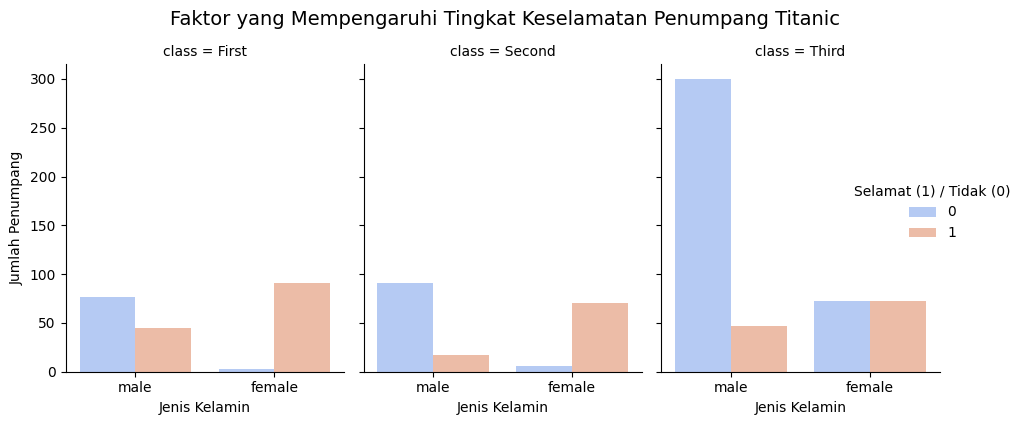

Grafik menunjukkan bahwa perempuan di semua kelas memiliki peluang selamat lebih tinggi. Penumpang kelas 1 memiliki tingkat survival tertinggi, sedangkan kelas 3 paling rendah. Faktor utama yang memengaruhi survival adalah jenis kelamin dan kelas penumpang.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset Titanic
titanic = sns.load_dataset('titanic')

# Membuat grid berdasarkan kelas penumpang
g = sns.catplot(
    x="sex", hue="survived", col="class",
    data=titanic, kind="count",
    palette="coolwarm", height=4, aspect=0.8
)

# Menambahkan judul dan label
g.fig.suptitle("Faktor yang Mempengaruhi Tingkat Keselamatan Penumpang Titanic", fontsize=14, y=1.05)
g.set_axis_labels("Jenis Kelamin", "Jumlah Penumpang")
g._legend.set_title("Selamat (1) / Tidak (0)")

plt.show()

print("Grafik menunjukkan bahwa perempuan di semua kelas memiliki peluang selamat lebih tinggi. "
      "Penumpang kelas 1 memiliki tingkat survival tertinggi, sedangkan kelas 3 paling rendah. "
      "Faktor utama yang memengaruhi survival adalah jenis kelamin dan kelas penumpang.")


#2.  Hubungan antara Kelas Penumpang dan Survival

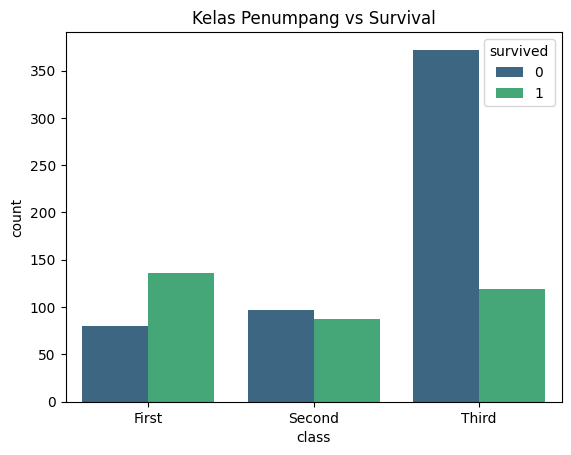

Kelas 1 memiliki tingkat survival tertinggi, diikuti kelas 2 dan 3.


In [ ]:
sns.countplot(x='class', hue='survived', data=titanic, palette='viridis')
plt.title("Kelas Penumpang vs Survival")
plt.show()

print("Kelas 1 memiliki tingkat survival tertinggi, diikuti kelas 2 dan 3.")


# 3. Interaksi antara Usia, Gender, dan Survival

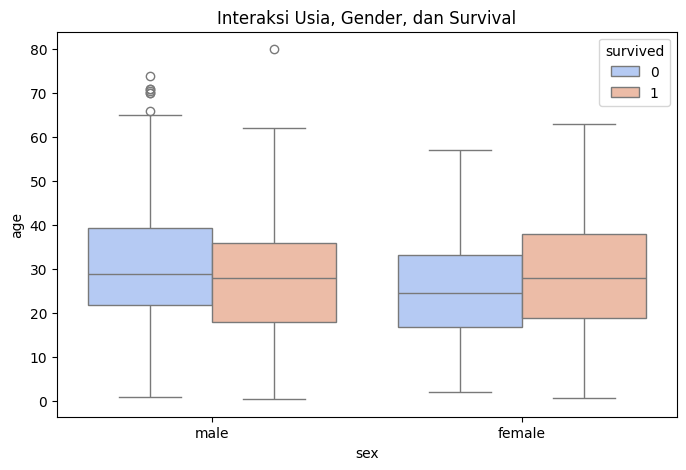

Penumpang perempuan dengan usia muda lebih banyak selamat. Laki-laki dewasa memiliki tingkat survival rendah.


In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='sex', y='age', hue='survived', data=titanic, palette='coolwarm')
plt.title("Interaksi Usia, Gender, dan Survival")
plt.show()

print("Penumpang perempuan dengan usia muda lebih banyak selamat. Laki-laki dewasa memiliki tingkat survival rendah.")


# 5. pola survival berdasarkan deck dan embarkation port

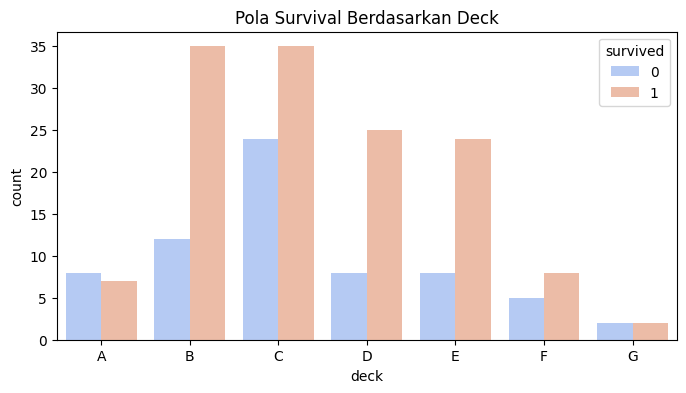

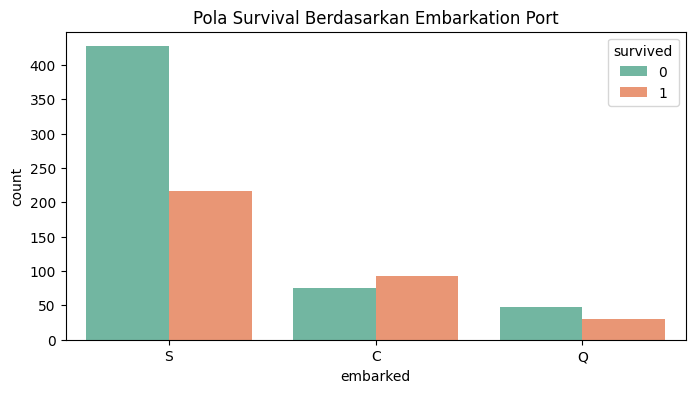

 Penumpang di deck atas (A, B, C) lebih banyak selamat dibanding deck bawah (E, F, G). Sementara itu, penumpang yang naik dari pelabuhan Southampton (S) memiliki tingkat survival tertinggi, kemungkinan karena lebih banyak berasal dari kelas 1.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')

# Visualisasi pola survival berdasarkan deck
plt.figure(figsize=(8,4))
sns.countplot(x='deck', hue='survived', data=titanic, palette='coolwarm')
plt.title("Pola Survival Berdasarkan Deck")
plt.show()

# Visualisasi pola survival berdasarkan embarkation port
plt.figure(figsize=(8,4))
sns.countplot(x='embarked', hue='survived', data=titanic, palette='Set2')
plt.title("Pola Survival Berdasarkan Embarkation Port")
plt.show()

print(" Penumpang di deck atas (A, B, C) lebih banyak selamat dibanding deck bawah (E, F, G). "
      "Sementara itu, penumpang yang naik dari pelabuhan Southampton (S) memiliki tingkat survival tertinggi, "
      "kemungkinan karena lebih banyak berasal dari kelas 1.")
